In [97]:
import sys

from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'
/workspaces/IA/_6_PS_PMC


/home/codespace/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


# Perceptrón Simple


Un Perceptrón simple (PS) es la red neuronal más sencilla que se puede considerar, está conformado por una sola neurona que posee N entradas y una función de transferencia de tipo umbral, tal como se ve en la siguiente figura:

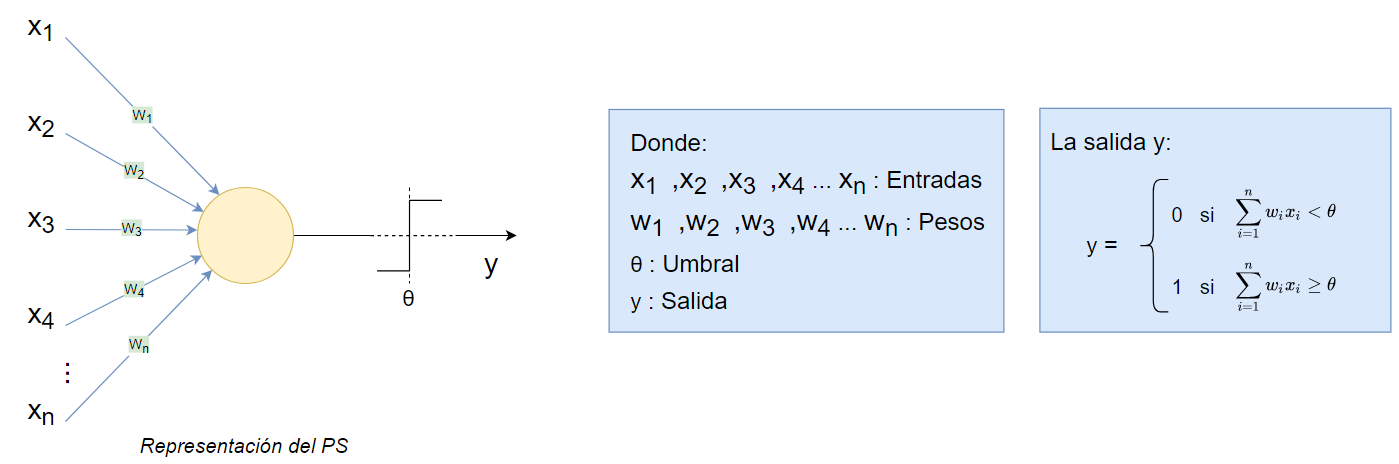

In [98]:
display(Image(filename='./2_imagenes/perceptron.png', width=1000))

Haciendo un pequeño cambio y llevando el umbral $\theta$ hacia la izquierda en las ecuaciones anteriores, podemos definir un nuevo peso
$w_0$ y la entrada $x_0 = 1$ para poder escribir la salida de forma más compacta:

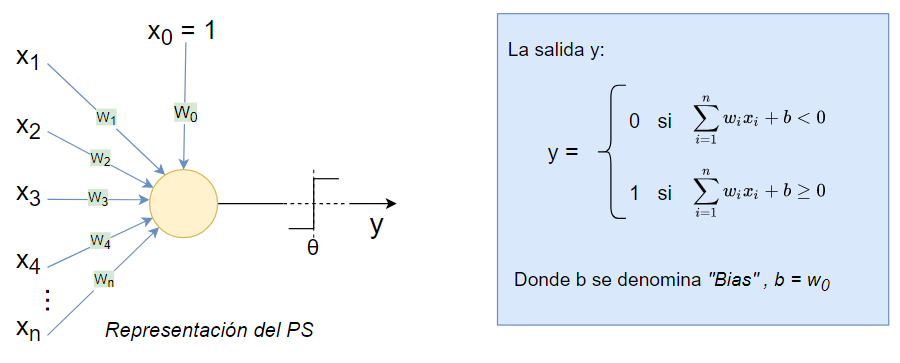

In [99]:
display(Image(filename='./2_imagenes/perceptron_bias.png', width=1000))

Podemos representar la salida con la siguiente expresión: $$y = sign(\sum\limits_{i=0}^N {x_i w_i})$$

_**sign**_ corresponde a la función signo y es la _función de activación_ del perceptrón simple. Más adelante veremos que existen otras funciones de activación para otras aplicaciones.

El PS permite resolver problemas linealmente separables mediante una recta o un hiperplano de separación con ordenada al origen distinta de cero gracias al término de _Bias_

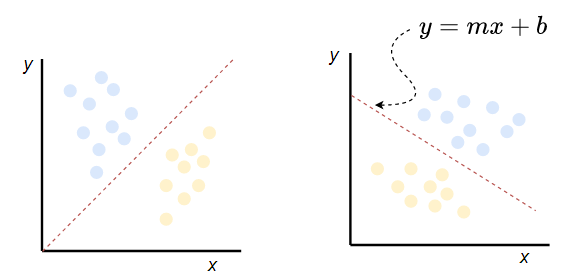

In [100]:
display(Image(filename='./2_imagenes/lineal_separable.png', width=700))

A continuación, vamos a implementar la _clase Perceptron_ y el algoritmo de entrenamiento o _Regla del Perceptrón Simple_ 🙂

Esta regla puede implementarse siguiendo estos pasos:
1. Inicializar el vector de pesos w con valores aleatorios entre 0 y 1.
2. Presentar un patrón de entrada x y calcular la salida $$y = sign(x_0 w_0 + \sum\limits_{i=1}^N {x_i w_i})$$  Recordemos que $w_0$ es el término correspondiente al bias y $x_0=1$, podemos representar la suma de productos usando un producto punto entre vectores: $$y = sign( w_0 + \vec{w}^T \cdot \vec{x})$$

3. Calcular el error entre la salida obtenida y la salida deseada $y_d$ $$e = y - y_d$$
4. Ajustar los pesos de la red con la siguiente ecuación: $$ \vec{w} = \vec{w} + \mu \vec{e} \cdot \vec{x}$$ $\mu$ es el coeficiente de aprendizaje o factor de entrenamiento (eta)
5. Volver al paso 2 y repetir el proceso hasta terminar el número de iteraciones

In [101]:
# Librerías a importar
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import pandas as pd

In [102]:
class Perceptron(object):
    """Perceptrón simple.

    Parámetros
    ------------
    eta : float
        factor de entrenamiento (entre 0.0 y 1.0)
    epocas : int
        iteraciones para el entrenamiento.
    random_state : int
        Semilla generadora de números aleatorios para la inicialización de los pesos.

    Atributos
    -----------
    w_ : 1d-array
        Pesos despues del entrenamiento.
    mal_clasificados_ : list
        Número de desaciertos en cada época
    """
    def __init__(self, eta=0.001, epocas=1, random_state=None):
        self.eta = eta
        self.epocas = epocas
        self.random_state = random_state

    def fit(self, X, y):
        """Función de entrenamiento.
        Parameters
        ----------
        X : array, shape = [n_muestras, n_caracteristicas]
          vector de entrenamiento
        y : array, shape = [n_muestras]
          vector target.

        Returns
        -------
        self : objeto

        """

        rgen = RandomState(self.random_state)
        #inicializo los pesos con valores aleatorios entre 0 y 1 rgen.normal
        # https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.normal.html

        self.w_ = np.zeros(1 + X.shape[1])
        self.mal_clasificados_ = []
        self.errores_ = []
    
        # para cada época
        for _ in range(self.epocas):
            errores = 0

            for xi, target in zip(X, y):

                # cálculo de la salida
                nuevo = self.eta * (target - self.predict(xi))

                # cálculo del error y actualización del vector de pesos
                self.w_[1:] += nuevo * xi
                self.w_[0] += nuevo
                if nuevo != 0.0:
                    errores += 1
                    self.mal_clasificados_.append((xi, target))
            self.errores_.append(errores)

        return self

    def calcular_entrada(self, x):
        """cálculo de la entrada al perceptrón"""
        # -------suma de los productos de los valores de entrada y los pesos -----------
        suma = sum([i * w for i, w in zip(x, self.w_)])
        return suma
        #-------------------------------------------------------------------------------

    def predict(self, X):
        """devuelve la etiqueta de la clase pertenciente después de aplicar la fn. de activación"""
        # la función de activación es la función signo:
        # 0 si el resultado de calcular_entrada < 0
        # 1 si el resultado de calcular_entrada >= 0

        if self.calcular_entrada(X) < 0:
            return 0 
        else:
            return 1
        

## Dataset Iris
El conjunto de datos flor Iris contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris versicolor e Iris virginica), en total 150 muestras. Se tienen 4 características: el largo y ancho del sépalo y pétalo, en centímetros.

In [103]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Graficamos el Dataset

Separe los datos en predictores (`X`) y etiquetas (`y`). Considere sólo las clases `setosa`y `versicolor` y los atributos de la primer y tercera columnas como características de entrada, Largo de sépalo (primer columna) y largo de pétalo (tercer columna). Grafique los datos.

In [104]:
#convertimos las etiquetas de clases en  0 (Iris-setosa)  y 1 (Iris-versicolor)

X = df.iloc[:, :-1]
y = df.iloc[:, -1].copy()

for x in range(len(y)):
    if y[x] == "Iris-setosa":
        y[x] = 0
    elif y[x] == "Iris-versicolor":
        y[x] = 1
    else:
        y[x] = 7 

y = y.astype(int)

X = X.iloc[:, [0, 2]].values

y


0      0
1      0
2      0
3      0
4      0
      ..
145    7
146    7
147    7
148    7
149    7
Name: 4, Length: 150, dtype: int64

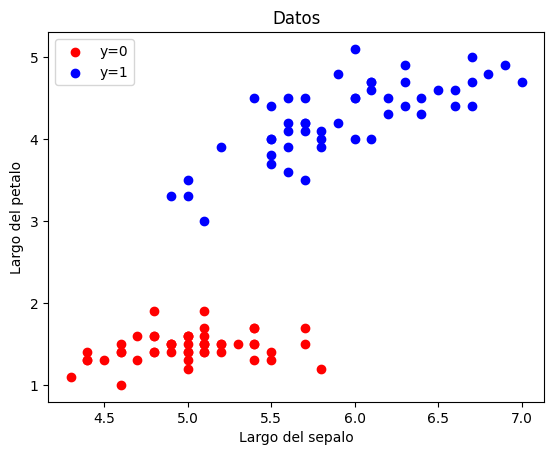

In [105]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='y=0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='y=1')

plt.xlabel('Largo del sepalo')
plt.ylabel('Largo del petalo')
plt.title('Datos')
plt.legend()

plt.show()

# Entrenamiento del Perceptrón

Utilice la clase implementada para entrenar el perceptrón, pruebe con diferentes valores de coeficiente de entrenamiento y número de iteraciones.

Haga un gráfico de los mal clasificados por época en función de las épocas y una gráfica de los errores de entrenamiento en cada iteración.

In [106]:
#Instancio un objeto de la clase Perceptron
perceptron = Perceptron()

#llamo al método fit
perceptron.fit(X, y)

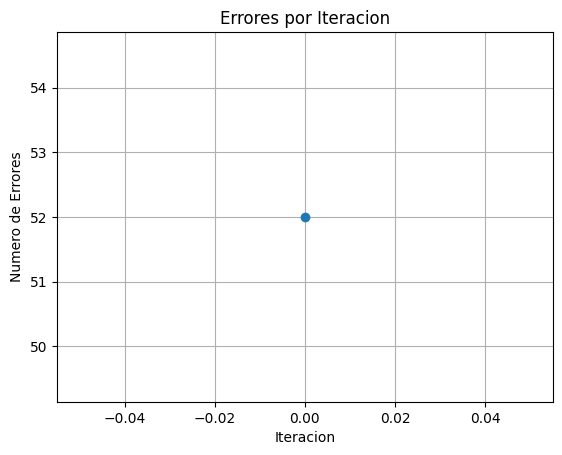

In [107]:
#Grafico el número de errores o mal clasificados en cada iteración

plt.plot(perceptron.errores_, marker='o')
plt.xlabel('Iteracion')
plt.ylabel('Numero de Errores')
plt.title('Errores por Iteracion')
plt.grid(True)
plt.show()

In [108]:
#Grafico el número de errores por época

Recordemos la ecuación: $$y = sign(w_0 + \sum\limits_{i=1}^N {x_i w_i})$$

Para este problema con dos características (x1 = longitudes del sépalo y x2= longitudes de pétalo ), la ecuación resulta:

$$y = sign(x_1 w_1 + x_2 w_2 + w_0)$$

Donde se separan las dos clases de flores, tendremos la frontera de decisión, dada por la ecuación:

$$x_1 w_1 + x_2 w_2 + w_0 = 0$$

De esta ecuación podemos despejar la recta $x_2$ en función de $x_1$ que separa las clases en el espacio de soluciones

$$x_2 + x_1 \frac{w_1}{w_2} + \frac{w_0}{w_2} = 0$$

$$x_2 =  -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2} $$

La pendiente de la recta  $ m = -\frac{w_1}{w_2}$ y la ordenada al origen $ b = - \frac{w_0}{w_2}$

### Ahora vamos a graficar esta recta

In [109]:
#------------------ Representación de la recta ------------------------------------
# vector de pesos del perceptrón entrenado
pesos = self.w
# cálculo de la pendiente

# cálculo de la ordenada al origen

# armo la recta y la grafico junto a los datos



## Perceptrón Usando scikit-learn

Ahora utilice las 3 clases del conjunto de datos usando las mismas características (atributos de la primer y tercera columnas). separe los datos en entrenamiento y prueba (20% datos de prueba), `random_state=100`

Entrene un perceptrón simple usando la clase [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) de scikit-learn.

Utilice la función plot_decision_regions para graficar las regiones de decisión de las 3 clases, grafique los datos de entrenamiento y prueba, diferenciándolos

Evalúe el desempeño del clasificador